In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
            print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-usage-and-emotional-well-being/val.csv
/kaggle/input/social-media-usage-and-emotional-well-being/train.csv
/kaggle/input/social-media-usage-and-emotional-well-being/test.csv


In [ ]:
#Here I am using only the training values for both testing and training purpose
train_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/train.csv',
                       on_bad_lines='skip')


In [3]:
print(train_df.head())

print(train_df.isnull().sum())

  User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0       1  25      Female  Instagram                       120.0   
1       2  30        Male    Twitter                        90.0   
2       3  22  Non-binary   Facebook                        60.0   
3       4  28      Female  Instagram                       200.0   
4       5  33        Male   LinkedIn                        45.0   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0            3.0                    45.0                       10.0   
1            5.0                    20.0                       25.0   
2            2.0                    15.0                        5.0   
3            8.0                   100.0                       30.0   
4            1.0                     5.0                        2.0   

   Messages_Sent_Per_Day Dominant_Emotion  
0                   12.0        Happiness  
1                   30.0            Anger  
2                   20.0        

In [4]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


In [5]:

#also gender has invalid data 
train_df['Gender'] = train_df['Gender'].str.strip().str.lower()
train_df['Gender'].unique()




array(['female', 'male', 'non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32'], dtype=object)

In [6]:
valid_genders = ['male', 'female', 'non-binary']
train_df = train_df[train_df['Gender'].isin(valid_genders)]
train_df['Gender'].unique()

array(['female', 'male', 'non-binary'], dtype=object)

In [7]:
#age also has invalid data
train_df['Age'].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32'], dtype=object)

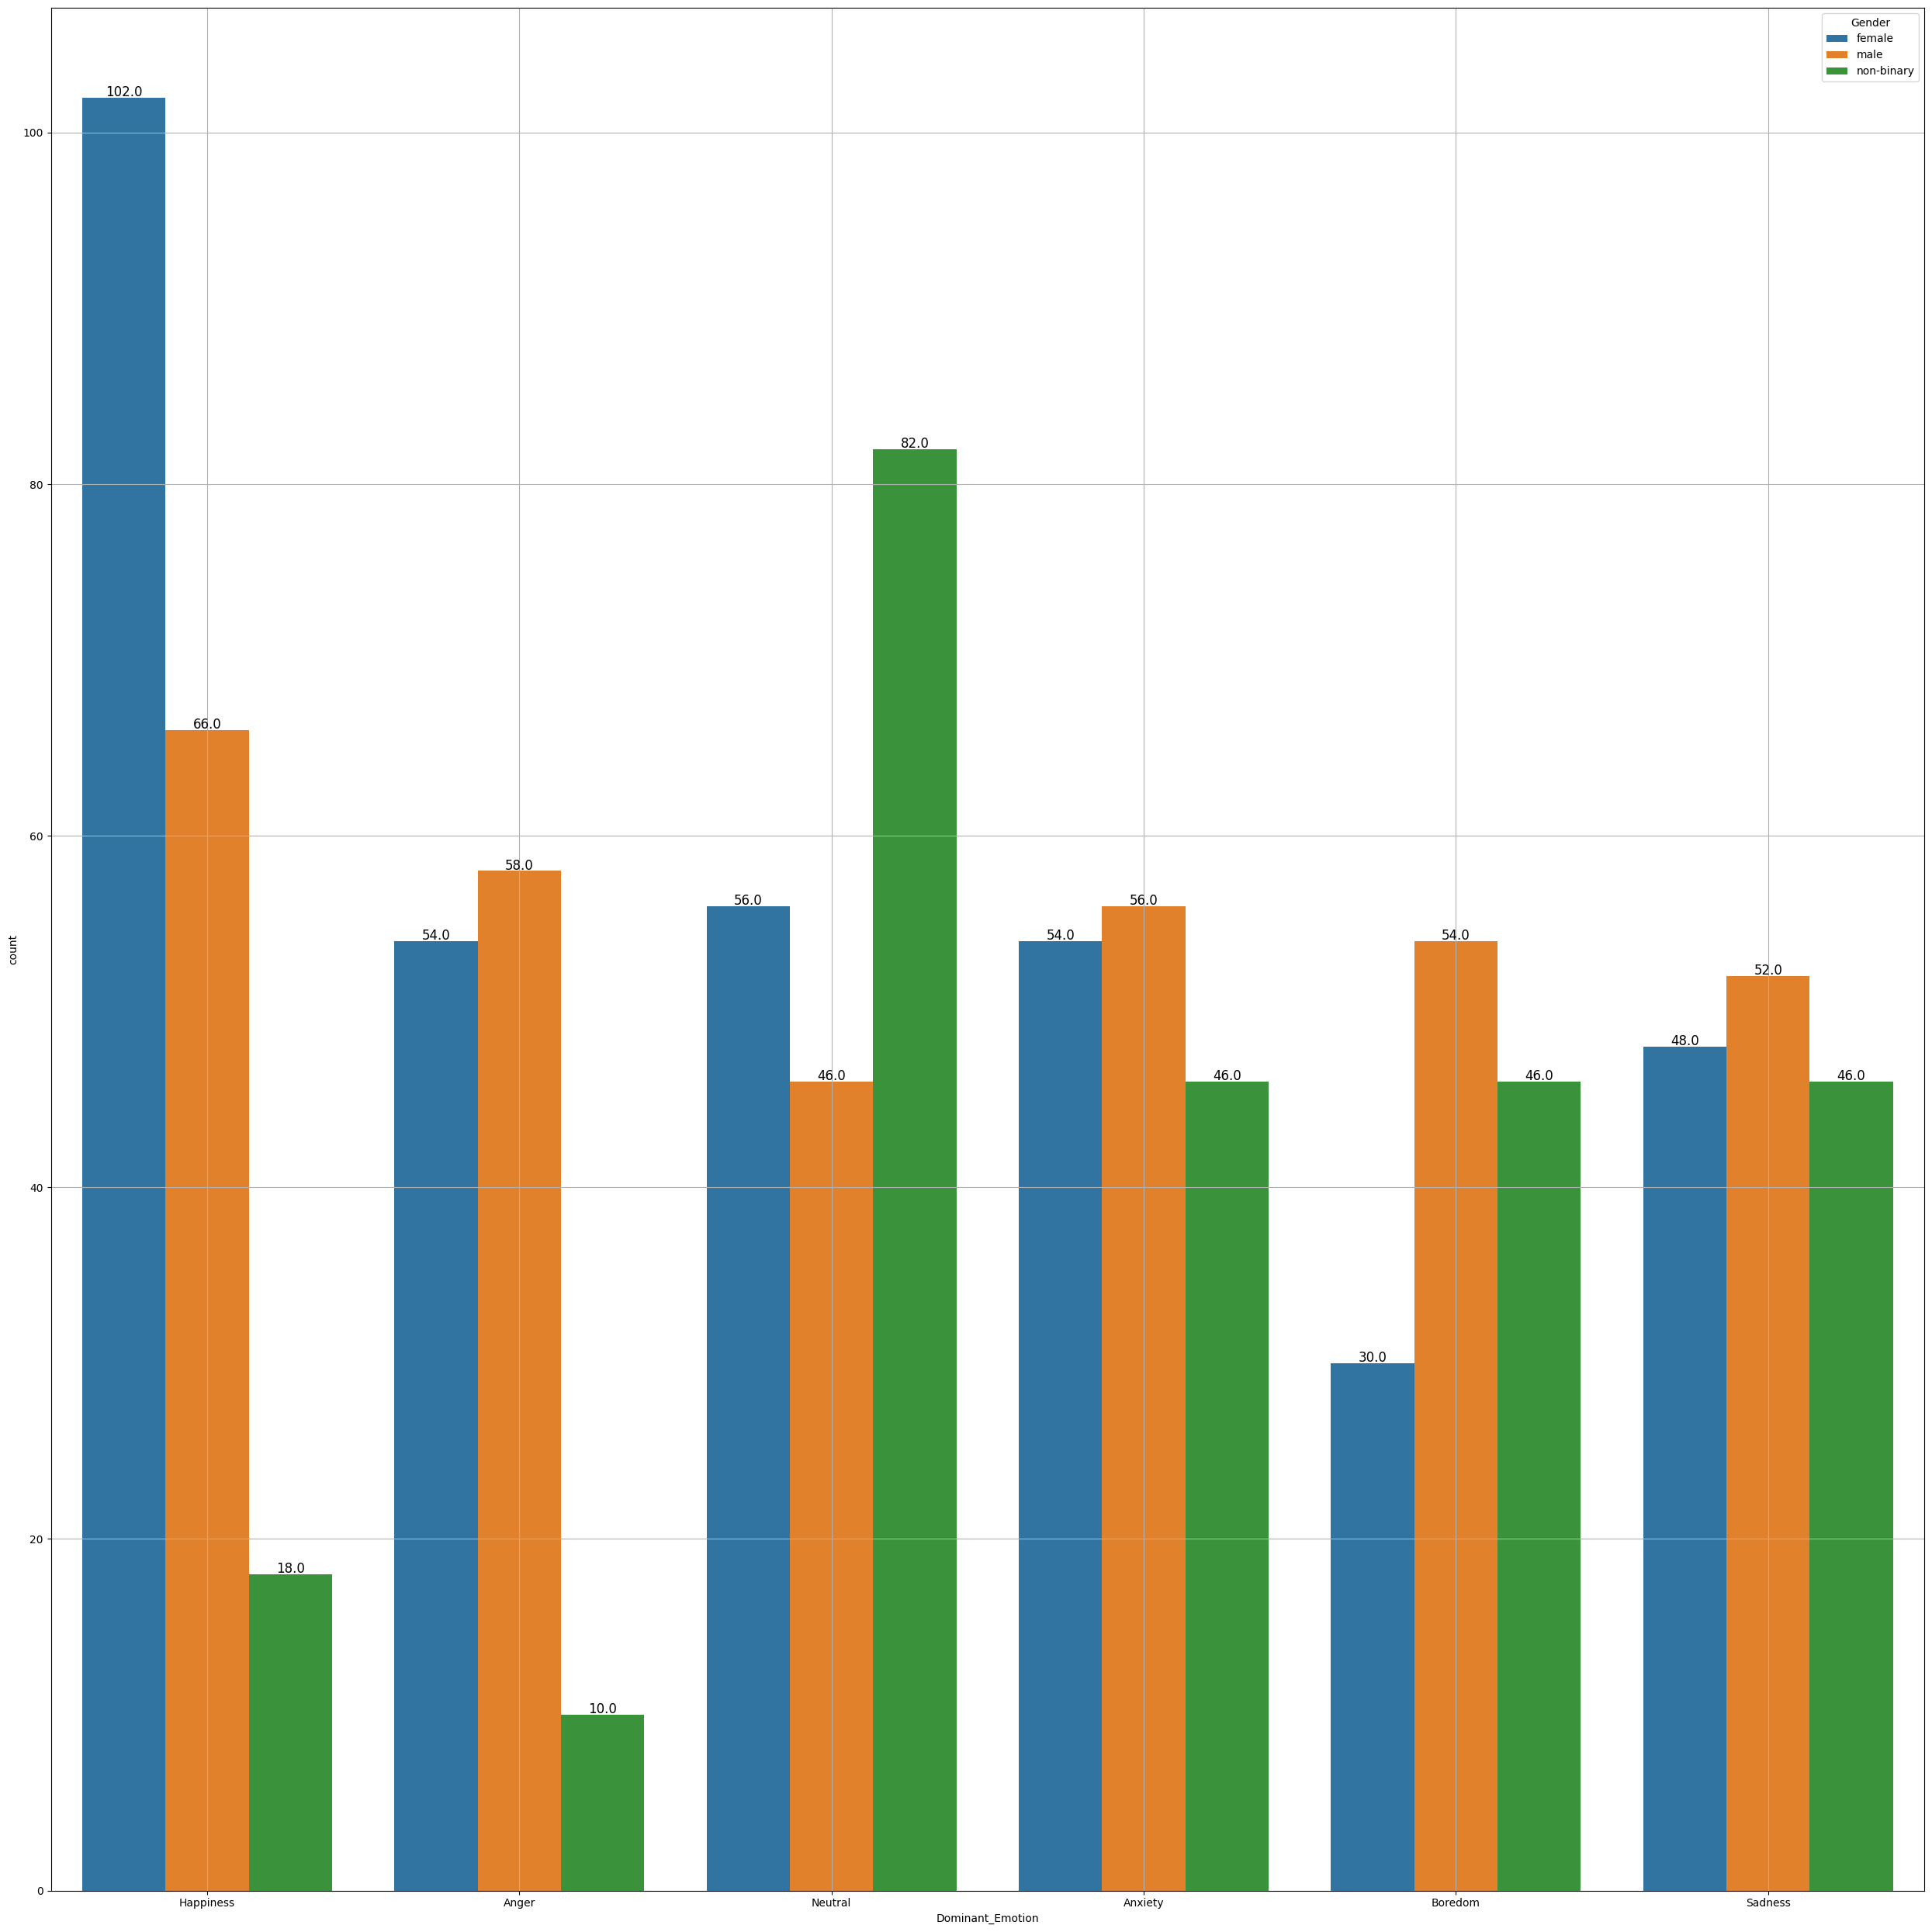

In [8]:
fig=plt.figure(figsize=(25,25))


ax=sns.countplot(x='Dominant_Emotion',data=train_df,hue= 'Gender')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.grid()
plt.show()

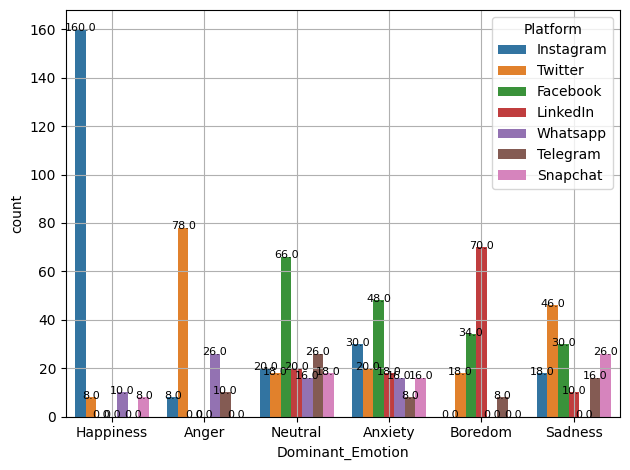

In [9]:
ax2 =sns.countplot(x= 'Dominant_Emotion',data=train_df,hue = 'Platform')

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=8, color='black', 
                xytext=(0, 1), textcoords='offset points')

plt.tight_layout()
plt.grid()
plt.show()

In [10]:
    # preparing data
    one = OneHotEncoder(sparse_output=False)
    #Gender Encoding
    encoded_Gender = one.fit_transform(train_df[['Gender']])
    labels = ['Female','Male','Non-Binary']
    gender_df = pd.DataFrame(encoded_Gender,columns=labels)
    print(gender_df)

     Female  Male  Non-Binary
0       1.0   0.0         0.0
1       0.0   1.0         0.0
2       0.0   0.0         1.0
3       1.0   0.0         0.0
4       0.0   1.0         0.0
..      ...   ...         ...
919     0.0   0.0         1.0
920     1.0   0.0         0.0
921     0.0   1.0         0.0
922     0.0   0.0         1.0
923     1.0   0.0         0.0

[924 rows x 3 columns]


In [11]:
#Encoding Platforms 
encoded_Platform  = one.fit_transform(train_df[['Platform']])
labels_platform  = ['FaceBook','Instagram','LinkedIN','Snapchat','Telegram','Twitter','WhatsApp']
platform_df= pd.DataFrame(encoded_Platform,columns=labels_platform)

print(platform_df)






     FaceBook  Instagram  LinkedIN  Snapchat  Telegram  Twitter  WhatsApp
0         0.0        1.0       0.0       0.0       0.0      0.0       0.0
1         0.0        0.0       0.0       0.0       0.0      1.0       0.0
2         1.0        0.0       0.0       0.0       0.0      0.0       0.0
3         0.0        1.0       0.0       0.0       0.0      0.0       0.0
4         0.0        0.0       1.0       0.0       0.0      0.0       0.0
..        ...        ...       ...       ...       ...      ...       ...
919       0.0        0.0       0.0       0.0       0.0      1.0       0.0
920       1.0        0.0       0.0       0.0       0.0      0.0       0.0
921       0.0        0.0       0.0       0.0       0.0      0.0       1.0
922       0.0        0.0       0.0       0.0       1.0      0.0       0.0
923       0.0        0.0       0.0       1.0       0.0      0.0       0.0

[924 rows x 7 columns]


Since we require the data as numerics we have use one hot encoder to convert the data to numerics 

Moreover since we have this data as 0 or 1 we dont require to scale the data

We will scale the rest of the data and then we will simply add these encoded columns at the end 

In [12]:
y_train = train_df['Dominant_Emotion']
x_train = train_df.drop(train_df[['Dominant_Emotion','Gender','Platform','User_ID']],axis =1)


#Scaling data


scale =StandardScaler()
column = x_train.columns


x_train = scale.fit_transform(x_train)
scaled_x = pd.DataFrame(x_train , columns=column)
scaled_x  =pd.concat([scaled_x,gender_df],axis=1)
scaled_x = pd.concat([scaled_x,platform_df],axis=1)
print(scaled_x.columns)
train_x ,test_x , train_y , test_y = train_test_split(scaled_x,y_train,test_size=0.2,random_state=1)
print(train_x.info())

Index(['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Female', 'Male', 'Non-Binary', 'FaceBook',
       'Instagram', 'LinkedIN', 'Snapchat', 'Telegram', 'Twitter', 'WhatsApp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 577 to 37
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         739 non-null    float64
 1   Daily_Usage_Time (minutes)  739 non-null    float64
 2   Posts_Per_Day               739 non-null    float64
 3   Likes_Received_Per_Day      739 non-null    float64
 4   Comments_Received_Per_Day   739 non-null    float64
 5   Messages_Sent_Per_Day       739 non-null    float64
 6   Female                      739 non-null    float64
 7   Male                        739 non-null    float64
 8   Non-Binary             

71.35135135135135


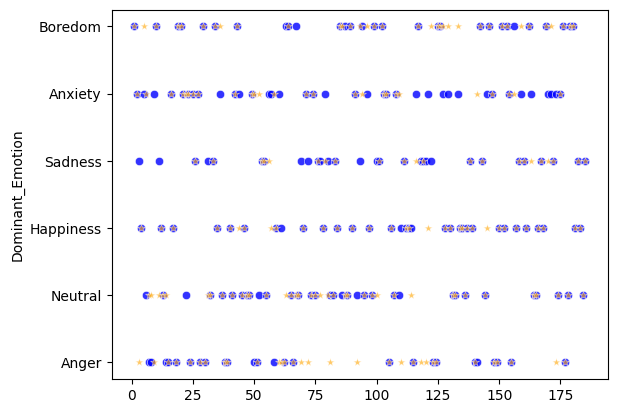

In [13]:
# training a model 
scorelist = []
namelist = []
#using SVM Model 
svm =SVC(random_state=1)
svm.fit(train_x,train_y)

score = svm.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("svm")
print(score)
#Visulising Result
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' ,data=None , alpha = 0.8)
sns.scatterplot(x=x,y=svm.predict(test_x),data=None , color = 'orange',alpha = 0.6,marker = '*')
plt.show()


52.43243243243243


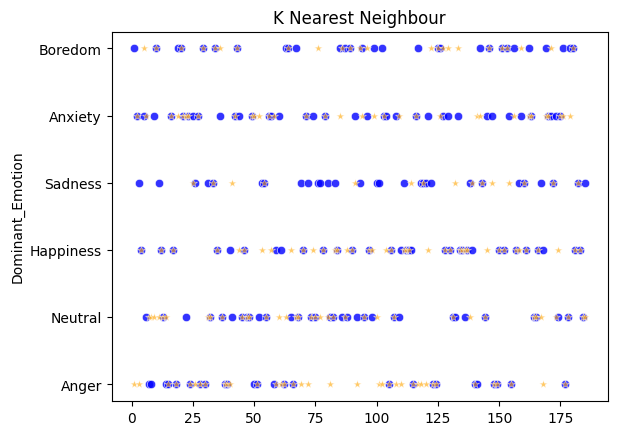

In [14]:
# using K Nearest Neighbour 

n= math.sqrt(len(train_x))
n= math.floor(n)
if(n%2==0 ):
    n=n+1

knn= KNeighborsClassifier(n_neighbors=n)

knn.fit(train_x,train_y)


score = knn.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("knn")

print(score)
#Visulising Result Accuracy
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=knn.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("K Nearest Neighbour")
plt.show()

54.054054054054056


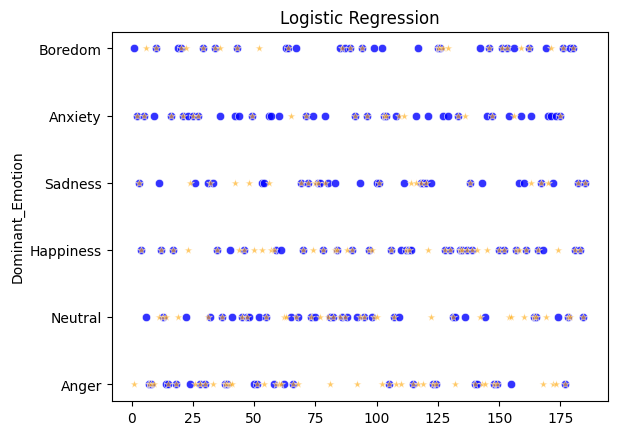

In [15]:
# using Logistic Regression 
log = LogisticRegression(random_state=1)
log.fit(train_x,train_y)

score = log.score(test_x,test_y)*100
scorelist.append (score)
print(score)

namelist.append ("log")
#Visualising the accuracy
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=log.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("Logistic Regression")
plt.show()

41.62162162162162


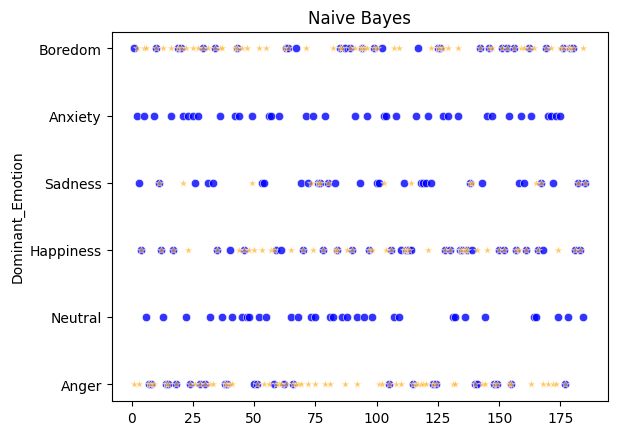

In [16]:
#using Naive Bayes

nb = GaussianNB()
nb.fit(train_x,train_y)

score = nb.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("NB")
print(score)
#Visulising Result Accuracy
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=nb.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("Naive Bayes")
plt.show()

94.05405405405406


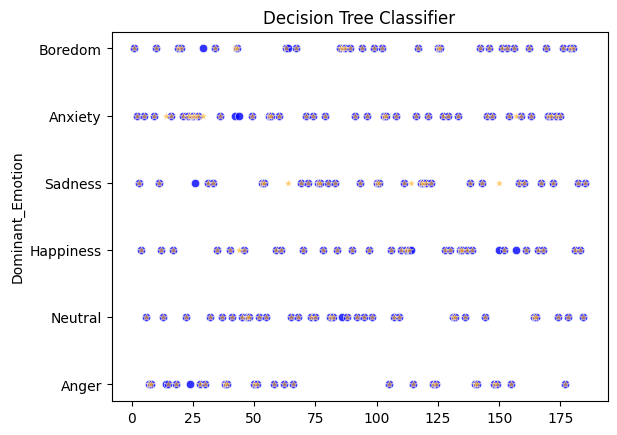

In [17]:
# using Decision Tree Classifier 

tree = DecisionTreeClassifier(random_state=1)

tree.fit(train_x,train_y)

score = tree.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("DecTree")
print(score)
#Visulising Result Accuracy 
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=tree.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("Decision Tree Classifier")
plt.show()

97.83783783783784


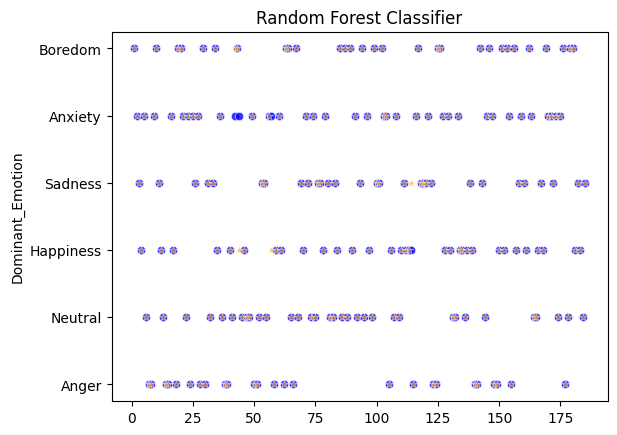

In [18]:
# using random forest clasifier
rfc= RandomForestClassifier(random_state=1)
rfc.fit(train_x,train_y)

score = rfc.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("RFC")
print(score)

#visualising accuracies
#Visulising Result Acuracy 
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=rfc.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("Random Forest Classifier")
plt.show()

In [19]:

'''
def readData():
    Age = int(input("Enter your Age \n"))
    Gender = int(input("Enter your gender 1.Female 2.Male 3.Non-Binary\n"))
    print("Enter your most used platform")
    print("[1.'FaceBook',2.'Instagram',3.'LinkedIN',4.'Snapchat',5.'Telegram',6.'Twitter',7.'WhatsApp']")
    Platform = int(input())
    use_time = int(input("Enter avg daily use time in minutes\n"))
    posts = int(input("Enter avg posts per day \n"))
    likes = int(input("Enter avg likes per day\n"))
    comments = int(input("Enter avg comments per day \n"))
    messages = int(input("Enter avg messages sent received per day \n"))

    x_custom_test = {
        'Age': Age,
        'Daily_Usage_Time (minutes)': use_time,
        'Posts_Per_Day': posts,
        'Likes_Received_Per_Day': likes,
        'Comments_Received_Per_Day': comments,
        'Messages_Sent_Per_Day': messages,
        'Female': 1 if Gender == 1 else 0,
        'Male': 1 if Gender == 2 else 0,
        'Non-Binary': 1 if Gender == 3 else 0,
        'FaceBook': 1 if Platform == 1 else 0,
        'Instagram': 1 if Platform == 2 else 0,
        'LinkedIN': 1 if Platform == 3 else 0,
        'Snapchat': 1 if Platform == 4 else 0,
        'Telegram': 1 if Platform == 5 else 0,
        'Twitter': 1 if Platform == 6 else 0,
        'WhatsApp': 1 if Platform == 7 else 0
    }
    custom_test = pd.DataFrame(x_custom_test, index=[0])
    return rfc.predict(custom_test) '''           


'\ndef readData():\n    Age = int(input("Enter your Age \n"))\n    Gender = int(input("Enter your gender 1.Female 2.Male 3.Non-Binary\n"))\n    print("Enter your most used platform")\n    print("[1.\'FaceBook\',2.\'Instagram\',3.\'LinkedIN\',4.\'Snapchat\',5.\'Telegram\',6.\'Twitter\',7.\'WhatsApp\']")\n    Platform = int(input())\n    use_time = int(input("Enter avg daily use time in minutes\n"))\n    posts = int(input("Enter avg posts per day \n"))\n    likes = int(input("Enter avg likes per day\n"))\n    comments = int(input("Enter avg comments per day \n"))\n    messages = int(input("Enter avg messages sent received per day \n"))\n\n    x_custom_test = {\n        \'Age\': Age,\n        \'Daily_Usage_Time (minutes)\': use_time,\n        \'Posts_Per_Day\': posts,\n        \'Likes_Received_Per_Day\': likes,\n        \'Comments_Received_Per_Day\': comments,\n        \'Messages_Sent_Per_Day\': messages,\n        \'Female\': 1 if Gender == 1 else 0,\n        \'Male\': 1 if Gender == 2 el

In [20]:
'''# fun
yes_no = int(input("Do you want to predict your Nature"))
#using random forest to predict data 
if(yes_no==1):
    prediction= readData()
    print(prediction)
    
    
'''

'# fun\nyes_no = int(input("Do you want to predict your Nature"))\n#using random forest to predict data \nif(yes_no==1):\n    prediction= readData()\n    print(prediction)\n    \n    \n'

if you want to try the last part just open my google collab nb that i will soon share 